In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

In [2]:
df_nb = pd.read_csv('/kaggle/input/laptop-specification-dataset/laptop_price (1).csv', encoding='latin1') 

### Let's dive into the dataset

In [3]:
df_nb.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


We have 1303 registries and 13 dimensions/features about notebooks.

In [4]:
df_nb.shape

(1303, 13)

In [5]:
df_nb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_in_euros    1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


If you see we have a lot of 'object' features, in other words are string/text-link features.

- **laptop_ID** -> code of notebook

- **Company** -> name of the notebook builder

- **Product** -> name of product

- **TypeName** -> type of notebook

- **Inches** -> inches of the panel screen

- **ScreenResolution** -> resolution of the screen and techonology e.g. hd, full hd, retina etc.

- **Cpu** -> microprocessor and speed 

- **Ram** -> amount of memory ram

- **Memory** -> drives of memory for save files and technology like 240 gb ssd.

- **Gpu** -> processor of graphics, integrated or dedicated.

- **OpSys** -> operative system running in the computer

- **Weight** -> weight of the computer

- **Price_in_euros** -> price in euros


### Let's clean up some of the data to expand our dataset

We have **ScreenResoluton**, **Cpu**, **Memory** and **GPU** with a lot of information about the computers in the dataset. For example, let's see the first registry on the dataset:

In [6]:
df_nb.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


In **ScreenResolution** we have information like technology of screen, IPS, propietary technology Retina and the pixel density. Let's work on this feature:

In [7]:
df_nb.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [8]:
df_nb.ScreenResolution.str.contains('ips', case=False).value_counts()

False    938
True     365
Name: ScreenResolution, dtype: int64

In [9]:
df_nb['ips'] = df_nb.ScreenResolution.str.contains('ips', case=False)

In [10]:
df_nb.ScreenResolution.str.contains('touch', case=False).value_counts()

False    1111
True      192
Name: ScreenResolution, dtype: int64

In [11]:
df_nb['touchscreen'] = df_nb.ScreenResolution.str.contains('touch', case=False)

In [12]:
((df_nb.ScreenResolution.str.contains('full hd', case=False)) | (df_nb.ScreenResolution.str.contains('1920x1080', case=False))).value_counts()

True     846
False    457
Name: ScreenResolution, dtype: int64

In [13]:
def extract_resolution(title):
    # Extract resolution in natural language
    natural_language_resolution = re.search(r'(HD\+|Full HD|4K Ultra HD|Ultra HD|Quad HD)', title)
    if natural_language_resolution:
        return natural_language_resolution.group()

    # Extract resolution in numbers
    number_resolution = re.search(r'\d{3,4}x\d{3,4}', title)
    if number_resolution:
        return number_resolution.group()

    # If no resolution is found
    return None

In [14]:
df_nb['resolution_parsed'] = df_nb.ScreenResolution.apply(lambda x: extract_resolution(x))

In [15]:
df_nb['resolution_parsed'].value_counts()

Full HD        843
1366x768       307
4K Ultra HD     43
Quad HD         30
1600x900        23
2560x1440       19
2560x1600        6
2304x1440        6
2256x1504        6
1440x900         4
2880x1800        4
1920x1200        4
2400x1600        4
1920x1080        3
2736x1824        1
Name: resolution_parsed, dtype: int64

In [16]:
df_nb['resolution_parsed'] = df_nb['resolution_parsed'].str.replace('Full HD','1920x1080')

In [17]:
df_nb['resolution_parsed'] = df_nb['resolution_parsed'].str.replace('4K Ultra HD','3840x2160')

In [18]:
df_nb['resolution_parsed'] = df_nb['resolution_parsed'].str.replace('Quad HD','2560x1440')

In [19]:
df_nb.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [20]:
def extract_storage_info(description):
    storage_pattern = r'(\d+(?:\.\d+)?)(GB|TB)\s+(SSD|HDD|Flash Storage|Hybrid)'
    storage_info = re.findall(storage_pattern, description)
    
    if not storage_info:
        return None
    
    memory = []
    technology = []
    
    for size, unit, tech in storage_info:
        size = float(size)
        
        if unit == 'TB':
            size *= 1024
        
        memory.append(size)
        technology.append(tech)
    
    return memory, technology

In [21]:
df_nb.Memory.fillna(-1,inplace=True)

In [22]:
df_nb.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution_parsed
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,True,False,2560x1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,False,1440x900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,1920x1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,True,False,2880x1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,True,False,2560x1600


In [23]:
df_nb.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [24]:
df_nb.iloc[151]

laptop_ID                                    154
Company                                     Dell
Product                            Inspiron 7567
TypeName                                  Gaming
Inches                                      15.6
ScreenResolution               Full HD 1920x1080
Cpu                  Intel Core i7 7700HQ 2.8GHz
Ram                                          8GB
Memory                              1.0TB Hybrid
Gpu                      Nvidia GeForce GTX 1050
OpSys                                 Windows 10
Weight                                    2.62kg
Price_in_euros                             899.0
ips                                        False
touchscreen                                False
resolution_parsed                      1920x1080
Name: 151, dtype: object

In [25]:
df_nb_memory = df_nb.Memory.apply(lambda x: extract_storage_info(x)[0])

In [26]:
df_nb

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution_parsed
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,True,False,2560x1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,False,1440x900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,False,1920x1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,True,False,2880x1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,True,False,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,True,True,1920x1080
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,True,True,2560x1440
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,False,False,1366x768
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,False,False,1366x768


In [27]:
df_nb['first_storage'] = df_nb_memory.apply(lambda x: x[0])

In [28]:
df_nb['second_storage'] = df_nb_memory.apply(lambda x: x[1] if len(x) > 1 else -1)

In [29]:
extract_storage_info('128GB SSD +  1TB HDD ')

([128.0, 1024.0], ['SSD', 'HDD'])

In [30]:
df_nb_memory_type = df_nb.Memory.apply(lambda x: extract_storage_info(x)[1])

In [31]:
df_nb['first_type'] = df_nb_memory_type.apply(lambda x: x[0])

In [32]:
df_nb['second_storage_type'] = df_nb_memory_type.apply(lambda x: x[1] if len(x) > 1 else -1)

In [33]:
df_nb.Weight.value_counts().tail(20)

2.26kg    1
2.79kg    1
3.42kg    1
2.54kg    1
1.79kg    1
0.91kg    1
4.33kg    1
4.4kg     1
1.94kg    1
2.72kg    1
4.5kg     1
1.41kg    1
1.14kg    1
3.8kg     1
3.6kg     1
3.25kg    1
4.7kg     1
1.55kg    1
1.18kg    1
4.0kg     1
Name: Weight, dtype: int64

In [34]:
df_nb.Weight = df_nb.Weight.str.replace('kg', '').astype(float)

In [35]:
df_nb.Ram = df_nb.Ram.str.replace('gb', '', case=False)

In [36]:
df_nb.Cpu.value_counts().head(25)

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i7 6820HK 2.7GHz     

In [37]:
df_nb.Cpu.value_counts().tail(25)

Intel Xeon E3-1535M v5 2.9GHz           1
AMD E-Series 6110 1.5GHz                1
AMD E-Series E2-6110 1.5GHz             1
AMD Ryzen 1600 3.2GHz                   1
Intel Atom x5-Z8300 1.44GHz             1
Intel Core i5 2.0GHz                    1
Intel Core i7 7700HQ 2.7GHz             1
Intel Core M m3-7Y30 2.2GHz             1
Intel Core i5 1.3GHz                    1
Intel Core i7 2.9GHz                    1
AMD FX 9830P 3GHz                       1
Intel Celeron Dual Core N3350 2.0GHz    1
Intel Core M m3 1.2GHz                  1
Intel Core i5 6440HQ 2.6GHz             1
Intel Core M 7Y30 1.0GHz                1
Intel Core i5 7500U 2.7GHz              1
Intel Core i7 2.8GHz                    1
Intel Core i3 6100U 2.1GHz              1
AMD E-Series E2-9000 2.2GHz             1
Intel Core i7 2.2GHz                    1
Intel Core M M3-6Y30 0.9GHz             1
AMD A9-Series 9420 2.9GHz               1
Intel Core i3 6006U 2.2GHz              1
AMD A6-Series 7310 2GHz           

### CPU and Brands

Let's explore brands and cpus

In [38]:
df_nb.Cpu[~((df_nb.Cpu.str.contains('intel', case=False)) | (df_nb.Cpu.str.contains('amd', case=False)))]

1191    Samsung Cortex A72&A53 2.0GHz
Name: Cpu, dtype: object

We have just one example of a computer with Samsung cpu, for that i decide to drop that value.

In [39]:
df_nb.drop(1191, axis=0, inplace=True)

For brands in Compay column, we mantain just registries with most than 20 examples an the others just droped out of the dataframe

In [40]:
df_nb.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [41]:
most_common_brands = df_nb.Company.value_counts().head(8).index.to_list()

In [42]:
df_nb = df_nb[df_nb.Company.str.contains('|'.join(most_common_brands))]

### GPU

Let's explore the gpu feature and the most common values.

In [43]:
df_nb.Gpu.value_counts().head(20)

Intel HD Graphics 620         267
Intel HD Graphics 520         183
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        65
Nvidia GeForce GTX 1060        45
Nvidia GeForce 940MX           41
AMD Radeon 530                 41
Intel HD Graphics 500          33
Intel HD Graphics 400          33
Nvidia GeForce GTX 1070        30
Nvidia GeForce GTX 1050 Ti     28
Intel HD Graphics              24
AMD Radeon R5 M430             22
Nvidia GeForce 930MX           20
AMD Radeon 520                 17
Intel HD Graphics 515          15
Nvidia GeForce GTX 960M        14
AMD Radeon R7 M445             14
Nvidia GeForce 920MX           13
Nvidia GeForce MX150           12
Name: Gpu, dtype: int64

In [44]:
df_nb.Gpu.value_counts().tail(20)

AMD Radeon Pro 455           1
Intel Iris Pro Graphics      1
AMD Radeon Pro 555           1
AMD Radeon Pro 560           1
AMD R4 Graphics              1
AMD Radeon RX 560            1
Nvidia GTX 980 SLI           1
AMD R17M-M1-70               1
Intel Iris Graphics 550      1
Nvidia GeForce GTX 940M      1
AMD FirePro W5130M           1
Intel HD Graphics 530        1
Nvidia GeForce GTX1080       1
Nvidia GeForce GTX1050 Ti    1
Nvidia Quadro M620M          1
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
Nvidia GeForce 960M          1
Name: Gpu, dtype: int64

Filter most common brands of GPU -> Intel, AMD and Nvidia

In [45]:
df_nb.Gpu[~((df_nb.Gpu.str.contains('intel', case=False)) | (df_nb.Gpu.str.contains('amd', case=False)) | (df_nb.Gpu.str.contains('nvidia', case=False)))]

Series([], Name: Gpu, dtype: object)

We check that we no have any gpu of other brand than I, AMD or Nvidia. Can create a new column condensing that information.

In [46]:
def cpu_gpu_brand(string):
    if 'intel' in string.lower():
        return 'intel'
    elif 'amd' in string.lower():
        return 'amd'
    else:
        return 'nvidia'

In [47]:
df_nb['gpu_brand'] = df_nb.Gpu.apply(lambda x: cpu_gpu_brand(x))

/tmp/ipykernel_20/1433070796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nb['gpu_brand'] = df_nb.Gpu.apply(lambda x: cpu_gpu_brand(x))


In [48]:
df_nb['cpu_brand'] = df_nb.Cpu.apply(lambda x: cpu_gpu_brand(x))

/tmp/ipykernel_20/708360143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nb['cpu_brand'] = df_nb.Cpu.apply(lambda x: cpu_gpu_brand(x))


In [49]:
df_nb_clean = df_nb.drop(['laptop_ID', 'Company', 'Product','ScreenResolution', 'Cpu', 'Memory', 'Gpu'], axis=1).reset_index().drop('index', axis=1)

In [50]:
df_nb_clean.second_storage_type = df_nb_clean.second_storage_type.astype('str')

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
df_nb_categorical = df_nb_clean[['TypeName', 'OpSys', 'resolution_parsed', 'first_type', 'second_storage_type', 'gpu_brand', 'cpu_brand']]

In [53]:
df_nb_categorical.apply(lambda x: LabelEncoder().fit_transform(x), axis=0)

,TypeName,OpSys,resolution_parsed,first_type,second_storage_type,gpu_brand,cpu_brand
0,4,8,7,3,0,1,1
1,4,8,1,0,0,1,1
2,3,4,3,3,0,1,1
3,4,8,8,3,0,0,1
4,4,8,7,3,0,1,1
...,...,...,...,...,...,...,...
1247,0,5,3,3,0,1,1
1248,0,5,6,3,0,1,1
1249,3,5,0,0,0,1,1
1250,3,5,0,1,0,0,1


In [54]:
def le_encoding(column):
    try:
        le = LabelEncoder()
        return LabelEncoder().fit_transform(column)
    except:
        pass
    

In [55]:
le_encoding(df_nb_categorical)

In [56]:
df_nb_categorical = df_nb_categorical.apply(lambda x: le_encoding(x))

In [57]:
df_nb_clean[['TypeName', 'OpSys', 'resolution_parsed', 'first_type', 'second_storage_type', 'gpu_brand', 'cpu_brand']] = df_nb_categorical

In [58]:
df_nb_clean

,TypeName,Inches,Ram,OpSys,Weight,Price_in_euros,ips,touchscreen,resolution_parsed,first_storage,second_storage,first_type,second_storage_type,gpu_brand,cpu_brand
0,4,13.3,8,8,1.37,1339.69,True,False,7,128.0,-1.0,3,0,1,1
1,4,13.3,8,8,1.34,898.94,False,False,1,128.0,-1.0,0,0,1,1
2,3,15.6,8,4,1.86,575.00,False,False,3,256.0,-1.0,3,0,1,1
3,4,15.4,16,8,1.83,2537.45,True,False,8,512.0,-1.0,3,0,0,1
4,4,13.3,8,8,1.37,1803.60,True,False,7,256.0,-1.0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,0,14.0,4,5,1.80,638.00,True,True,3,128.0,-1.0,3,0,1,1
1248,0,13.3,16,5,1.30,1499.00,True,True,6,512.0,-1.0,3,0,1,1
1249,3,14.0,2,5,1.50,229.00,False,False,0,64.0,-1.0,0,0,1,1
1250,3,15.6,6,5,2.19,764.00,False,False,0,1024.0,-1.0,1,0,0,1


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [60]:
df_nb_clean.Ram = df_nb_clean.Ram.astype('int')

In [61]:
df_nb_clean.ips = df_nb_clean.ips.astype(int)
df_nb_clean.touchscreen = df_nb_clean.touchscreen.astype(int)


In [62]:
X = df_nb_clean.drop('Price_in_euros', axis=1)
y = df_nb_clean.Price_in_euros

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
rfr = RandomForestRegressor()

In [64]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
y_pred = rfr.predict(X_test)

In [66]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [67]:
regression_results(y_test, y_pred)

explained_variance:  0.7947
mean_squared_log_error:  0.0555
r2:  0.7946
MAE:  190.7643
MSE:  85138.327
RMSE:  291.7847


In [68]:
pip install sklearn-evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 23.1 which is incompatible.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires

<Axes: title={'center': 'Residuals Plot'}, xlabel='Predicted Value', ylabel='Residuals'>

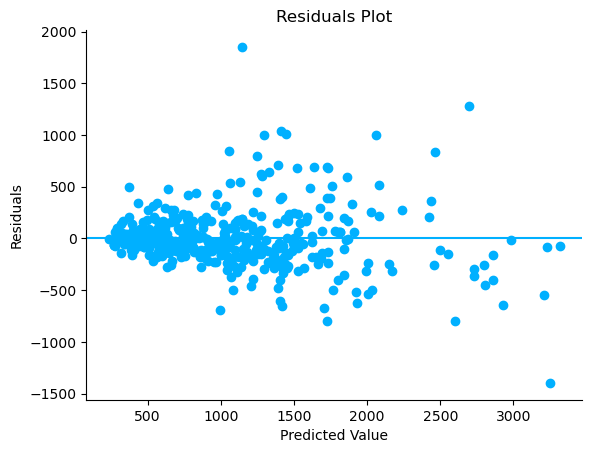

In [69]:
from sklearn_evaluation import plot

plot.residuals(y_test, y_pred)

In [70]:
dict_f_importance = dict(zip(rfr.feature_names_in_,rfr.feature_importances_))

<Axes: >

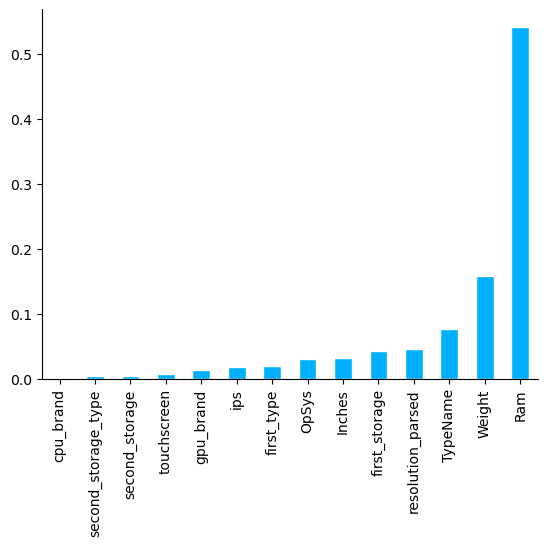

In [71]:
pd.Series(dict_f_importance).sort_values().plot(kind='bar')

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7515784923192175


In [74]:
y_pred_grid = grid_search.predict(X_test)
regression_results(y_test, y_pred_grid)

explained_variance:  0.9347
mean_squared_log_error:  0.0214
r2:  0.9347
MAE:  110.5957
MSE:  27051.453
RMSE:  164.4733


<Axes: title={'center': 'Residuals Plot'}, xlabel='Predicted Value', ylabel='Residuals'>

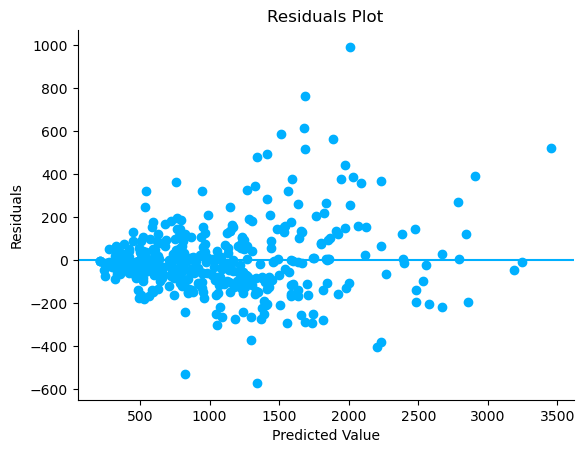

In [75]:
plot.residuals(y_test, y_pred_grid)

<Axes: >

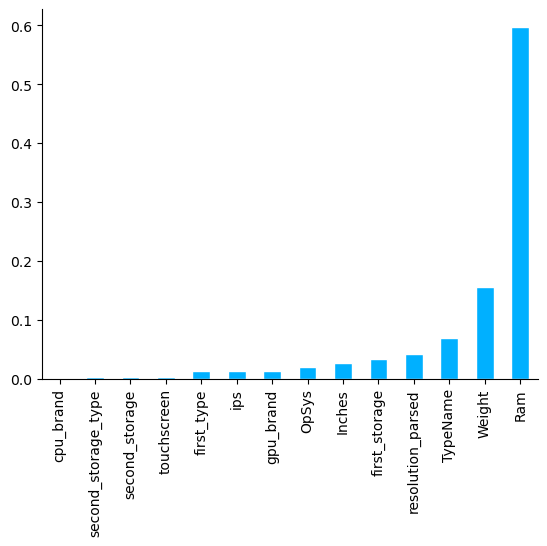

In [76]:
grid_search.best_estimator_.feature_importances_

dict_f_importance = dict(zip(grid_search.best_estimator_.feature_names_in_,grid_search.best_estimator_.feature_importances_))

pd.Series(dict_f_importance).sort_values().plot(kind='bar')